In [1]:
'''Main function for UCI letter and spam datasets.
'''

'Main function for UCI letter and spam datasets.\n'

In [1]:
# Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import argparse
import numpy as np

In [3]:
from data_loader import data_loader
from gain import gain
from utils import rmse_loss

Using TensorFlow backend.


In [6]:
def main (args):
  '''Main function for UCI letter and spam datasets.
  
  Args:
    - data_name: letter or spam
    - miss_rate: probability of missing components
    - batch:size: batch size
    - hint_rate: hint rate
    - alpha: hyperparameter
    - iterations: iterations
    
  Returns:
    - imputed_data_x: imputed data
    - rmse: Root Mean Squared Error
  '''
  
  data_name = args['data_name']
  miss_rate = args['miss_rate']
  
  gain_parameters = {'batch_size': args['batch_size'],
                     'hint_rate': args['hint_rate'],
                     'alpha': args['alpha'],
                     'iterations': args['iterations']}
  
  # Load data and introduce missingness
  ori_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)
  
  # Impute missing data
  imputed_data_x = gain(miss_data_x, gain_parameters)
  
  # Report the RMSE performance
  rmse = rmse_loss (ori_data_x, imputed_data_x, data_m)
  
  print()
  print('RMSE Performance: ' + str(np.round(rmse, 4)))
  
  return imputed_data_x, rmse

In [31]:
args = {}
args['data_name'] = 'spam'
args['miss_rate'] = 0.2
args['batch_size'] = 128
args['hint_rate'] = 0.9
args['alpha'] = 100
args['iterations'] = 10000

In [7]:
args['data_name']

'spam'

In [32]:
imputed_data, rmse = main(args)

100%|██████████| 10000/10000 [00:59<00:00, 169.47it/s]



RMSE Performance: 0.0542


In [33]:
args = {}
data_name = 'spam'
miss_rate = 0.2

# Load data and introduce missingness
orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)

gain_parameters = {'batch_size': 128,
                 'hint_rate': 0.9,
                 'alpha': 100,
                 'iterations': 100}

loss = []
iterations = []
for i in range(1,101):
    iterations.append(i)
    gain_parameters['iterations'] = i
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))


100%|██████████| 100/100 [00:06<00:00, 15.42it/s]


Text(0.5, 0, 'Number of iterations')

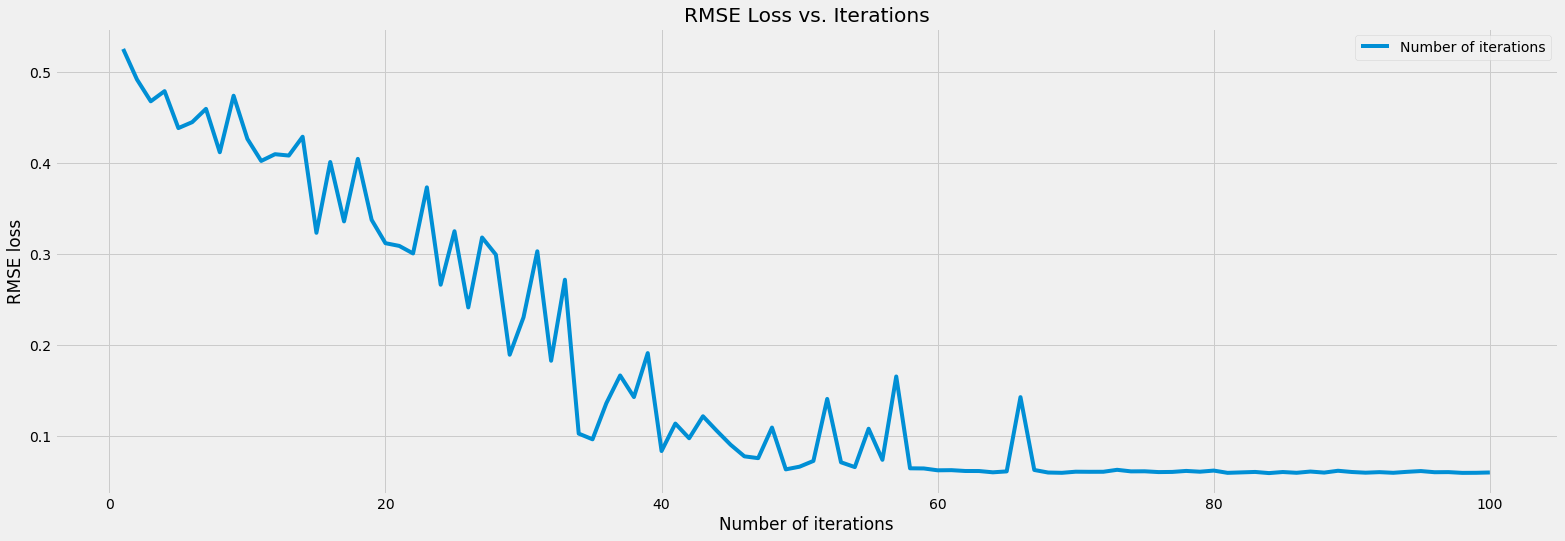

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Iterations")
plt.plot(iterations, loss, label = "Number of iterations")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Number of iterations")

In [ ]:
iterations[loss.index(min(loss))]

In [21]:
gain_parameters['iterations'] = 89
imputed_data_x = gain(miss_data_x, gain_parameters)
print(rmse_loss (orig_data_x, imputed_data_x, data_m))

100%|██████████| 89/89 [00:20<00:00,  4.35it/s]


0.056998904196107446


In [38]:
data_name = 'spam'
miss_rate = 0.2

# Load data and introduce missingness
orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)

gain_parameters = {'batch_size': 128,
                 'hint_rate': 0.9,
                 'alpha': 100,
                 'iterations': 10000}

loss = []
alphas = [10,20,30,40,50,60,70,80,90,100]
for i in range(len(alphas)):
    print(i)
    gain_parameters['alpha'] = alphas[i]
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))

0


100%|██████████| 10000/10000 [01:03<00:00, 157.78it/s]


1


100%|██████████| 10000/10000 [01:07<00:00, 148.17it/s]


2


100%|██████████| 10000/10000 [01:06<00:00, 150.07it/s]


3


100%|██████████| 10000/10000 [01:07<00:00, 147.42it/s]


4


100%|██████████| 10000/10000 [01:07<00:00, 148.63it/s]


5


100%|██████████| 10000/10000 [01:05<00:00, 152.98it/s]


6


100%|██████████| 10000/10000 [01:08<00:00, 146.87it/s]


7


100%|██████████| 10000/10000 [01:05<00:00, 152.14it/s]


8


100%|██████████| 10000/10000 [01:07<00:00, 148.23it/s]


9


100%|██████████| 10000/10000 [01:08<00:00, 146.64it/s]


Text(0.5, 0, 'Learning Rate')

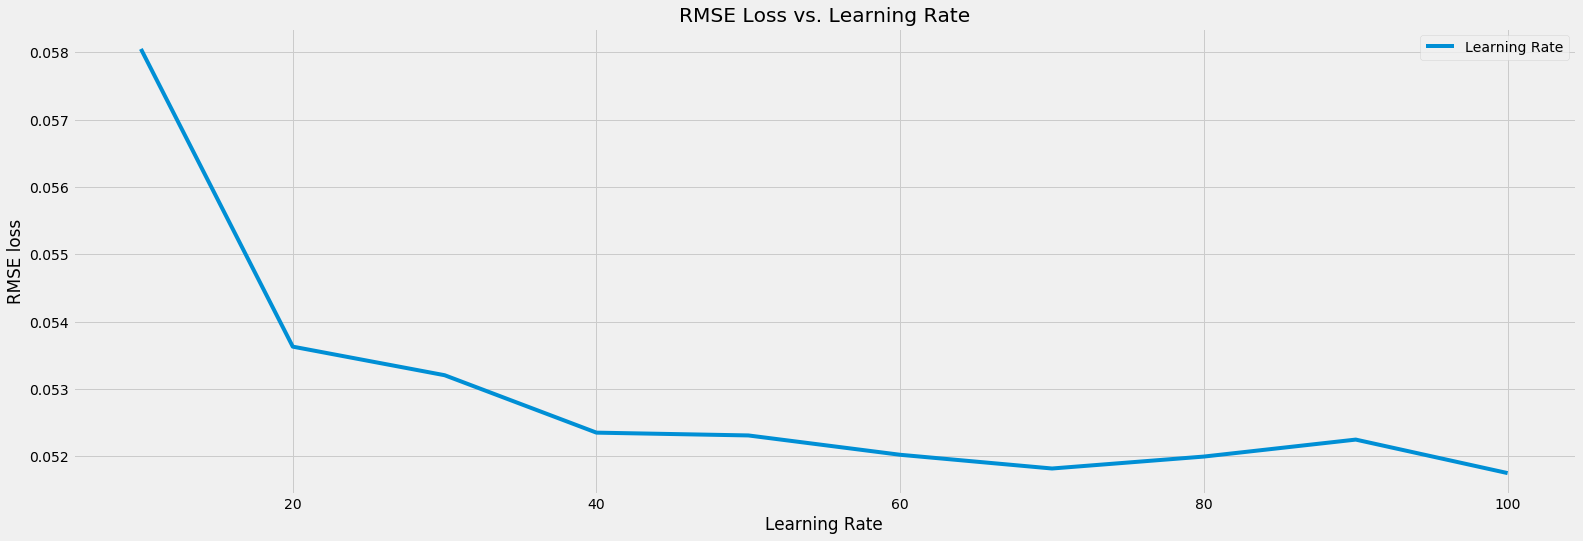

In [39]:
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Learning Rate")
plt.plot(alphas, loss, label = "Learning Rate")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Learning Rate")

In [40]:
min(loss)

0.051752334416733756

In [41]:
alphas[loss.index(min(loss))]

100

In [35]:
data_name = 'spam'
miss_rate = 0.2

# Load data and introduce missingness
orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)

gain_parameters = {'batch_size': 128,
                 'hint_rate': 0.9,
                 'alpha': 100,
                 'iterations': 10000}

loss = []
hint_rates = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in range(len(hint_rates)):
    print(i)
    gain_parameters['hint_rate'] = hint_rates[i]
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))

0


100%|██████████| 10000/10000 [01:08<00:00, 146.83it/s]


1


100%|██████████| 10000/10000 [01:08<00:00, 146.26it/s]


2


100%|██████████| 10000/10000 [01:09<00:00, 144.65it/s]


3


100%|██████████| 10000/10000 [01:06<00:00, 150.35it/s]


4


100%|██████████| 10000/10000 [01:09<00:00, 144.83it/s]


5


100%|██████████| 10000/10000 [01:06<00:00, 149.26it/s]


6


100%|██████████| 10000/10000 [01:08<00:00, 145.56it/s]


7


100%|██████████| 10000/10000 [01:07<00:00, 148.16it/s]


8


100%|██████████| 10000/10000 [01:06<00:00, 149.99it/s]


9


100%|██████████| 10000/10000 [01:08<00:00, 144.99it/s]


Text(0.5, 0, 'Hint Rate')

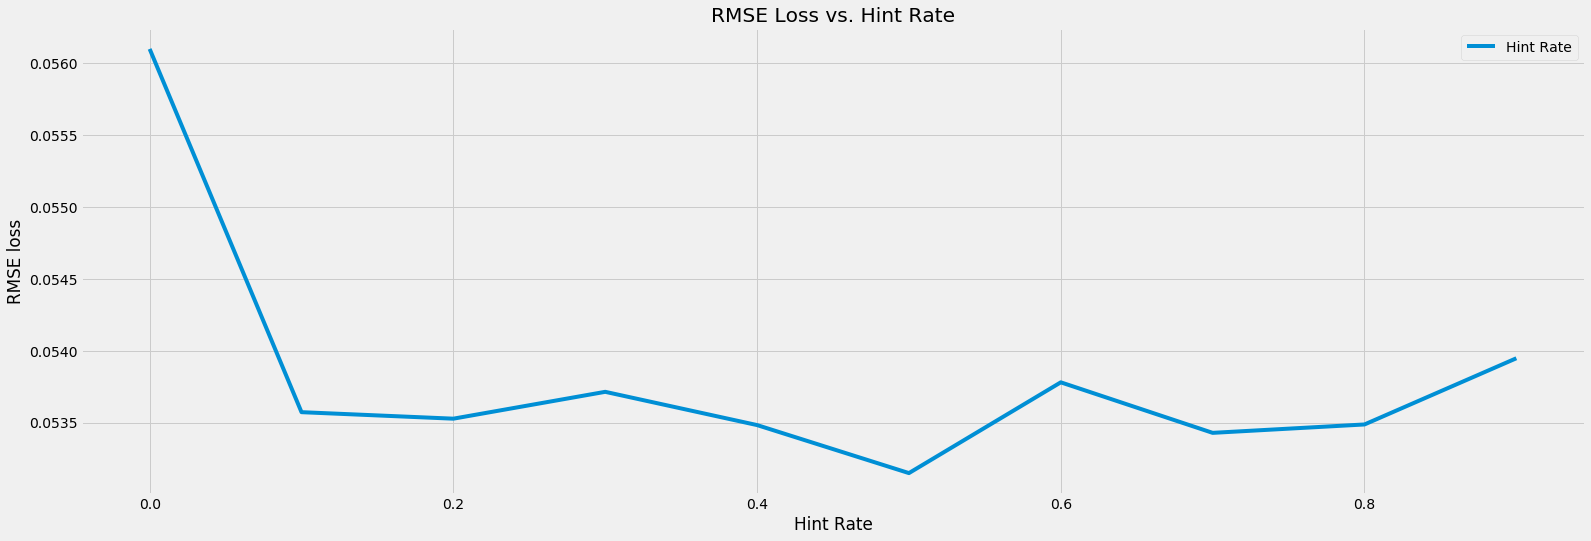

In [37]:
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Hint Rate")
plt.plot(hint_rates, loss, label = "Hint Rate")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Hint Rate")

In [42]:
data_name = 'spam'
miss_rate = 0.2

# Load data and introduce missingness
orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)

gain_parameters = {'batch_size': 128,
                 'hint_rate': 0.9,
                 'alpha': 100,
                 'iterations': 10000}

loss = []
iterations = [100,500,1000,3000,5000,7000,10000,12000,15000,20000]
for i in range(len(iterations)):
    print(i)
    gain_parameters['iterations'] = iterations[i]
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))

0


100%|██████████| 100/100 [00:08<00:00, 11.77it/s]


1


100%|██████████| 500/500 [00:10<00:00, 49.14it/s] 


2


100%|██████████| 1000/1000 [00:14<00:00, 70.40it/s]


3


100%|██████████| 3000/3000 [00:25<00:00, 116.30it/s]


4


100%|██████████| 5000/5000 [00:35<00:00, 141.73it/s]


5


100%|██████████| 7000/7000 [00:50<00:00, 138.60it/s]


6


100%|██████████| 10000/10000 [01:07<00:00, 148.36it/s]


7


100%|██████████| 12000/12000 [01:20<00:00, 148.35it/s]


8


100%|██████████| 15000/15000 [01:40<00:00, 149.82it/s]


9


100%|██████████| 20000/20000 [02:11<00:00, 152.24it/s]


Text(0.5, 0, 'Number of Iterations')

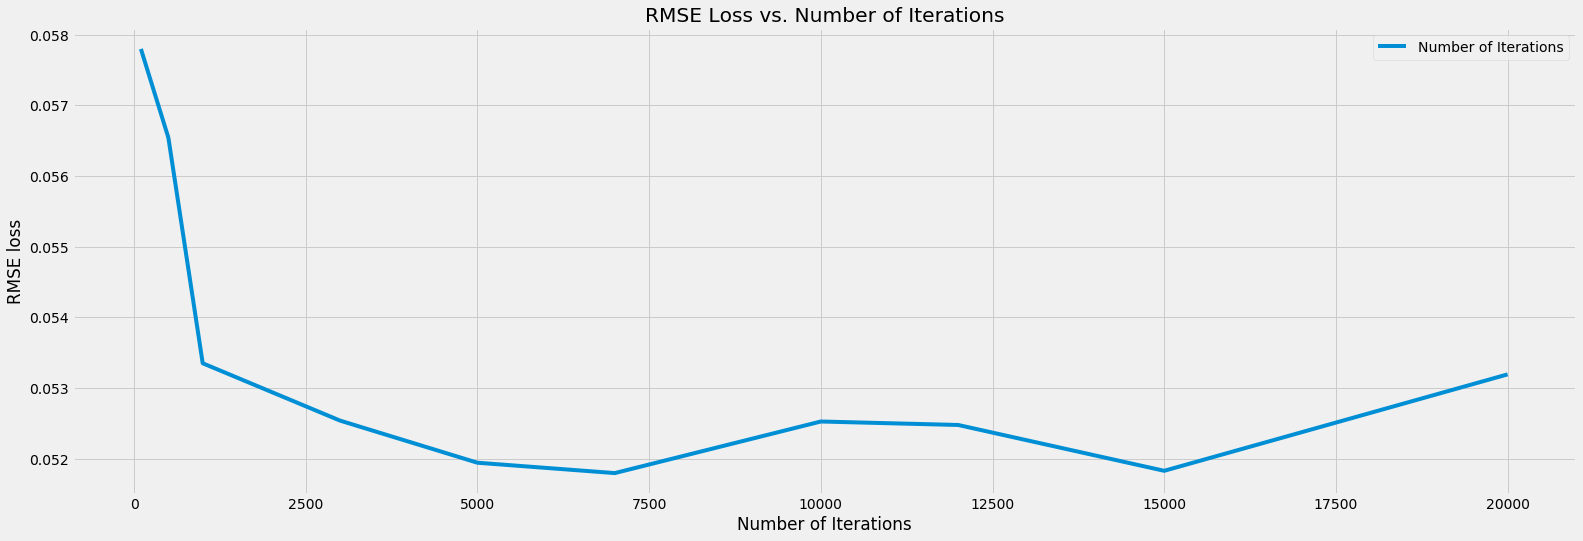

In [43]:
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Number of Iterations")
plt.plot(iterations, loss, label = "Number of Iterations")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Number of Iterations")

In [44]:
iterations[loss.index(min(loss))]

7000

In [45]:
min(loss)

0.05179686031500942

In [46]:
data_name = 'spam'
miss_rate = 0.2

# Load data and introduce missingness
orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate)

gain_parameters = {'batch_size': 128,
                 'hint_rate': 0.9,
                 'alpha': 100,
                 'iterations': 7000}

loss = []
batch_size = [32,64,128,256,512,1024]
for i in range(len(batch_size)):
    print(i)
    gain_parameters['batch_size'] = batch_size[i]
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))

0


100%|██████████| 7000/7000 [00:40<00:00, 172.35it/s]


1


100%|██████████| 7000/7000 [00:43<00:00, 159.24it/s]


2


100%|██████████| 7000/7000 [00:53<00:00, 131.91it/s]


3


100%|██████████| 7000/7000 [01:09<00:00, 100.03it/s]


4


100%|██████████| 7000/7000 [01:35<00:00, 73.50it/s]


5


100%|██████████| 7000/7000 [02:16<00:00, 51.32it/s]


6


IndexError: list index out of range

Text(0.5, 0, 'Batch size')

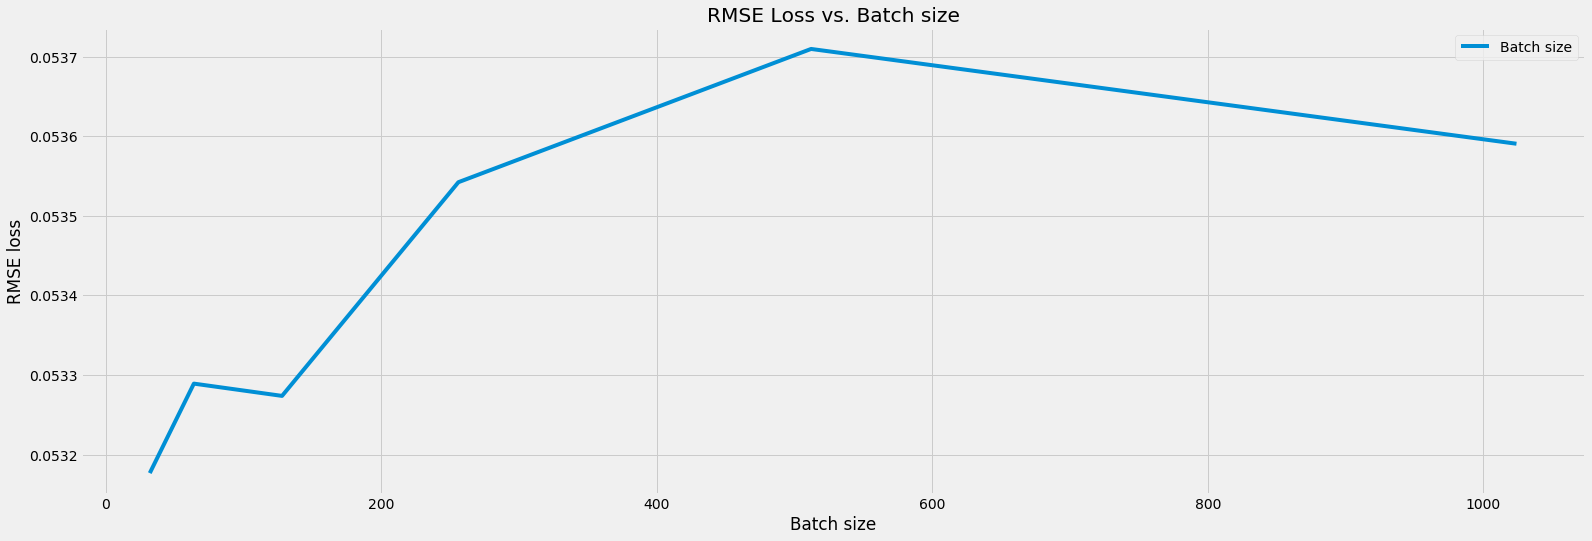

In [48]:
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Batch size")
plt.plot(batch_size, loss, label = "Batch size")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Batch size")

In [49]:
batch_size[loss.index(min(loss))]

32

In [50]:
min(loss)

0.05317682919728112

In [51]:
data_name = 'spam'
miss_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loss = []
gain_parameters = {'batch_size': 32,
                     'hint_rate': 0.9,
                     'alpha': 100,
                     'iterations': 7000}
       

for i in range(len(miss_rate)):
    print(i)
    # Load data and introduce missingness
    orig_data_x, miss_data_x, data_m = data_loader(data_name, miss_rate[i])
    imputed_data_x = gain(miss_data_x, gain_parameters)
    loss.append(rmse_loss (orig_data_x, imputed_data_x, data_m))

0


100%|██████████| 7000/7000 [00:40<00:00, 170.78it/s]


1


100%|██████████| 7000/7000 [00:44<00:00, 156.81it/s]


2


100%|██████████| 7000/7000 [00:42<00:00, 163.01it/s]


3


100%|██████████| 7000/7000 [00:41<00:00, 168.02it/s]


4


100%|██████████| 7000/7000 [00:40<00:00, 173.11it/s]


5


100%|██████████| 7000/7000 [00:40<00:00, 173.26it/s]


6


100%|██████████| 7000/7000 [00:38<00:00, 181.24it/s]


7


100%|██████████| 7000/7000 [00:40<00:00, 172.67it/s]


8


100%|██████████| 7000/7000 [00:41<00:00, 169.94it/s]


Text(0.5, 0, 'Miss Rate')

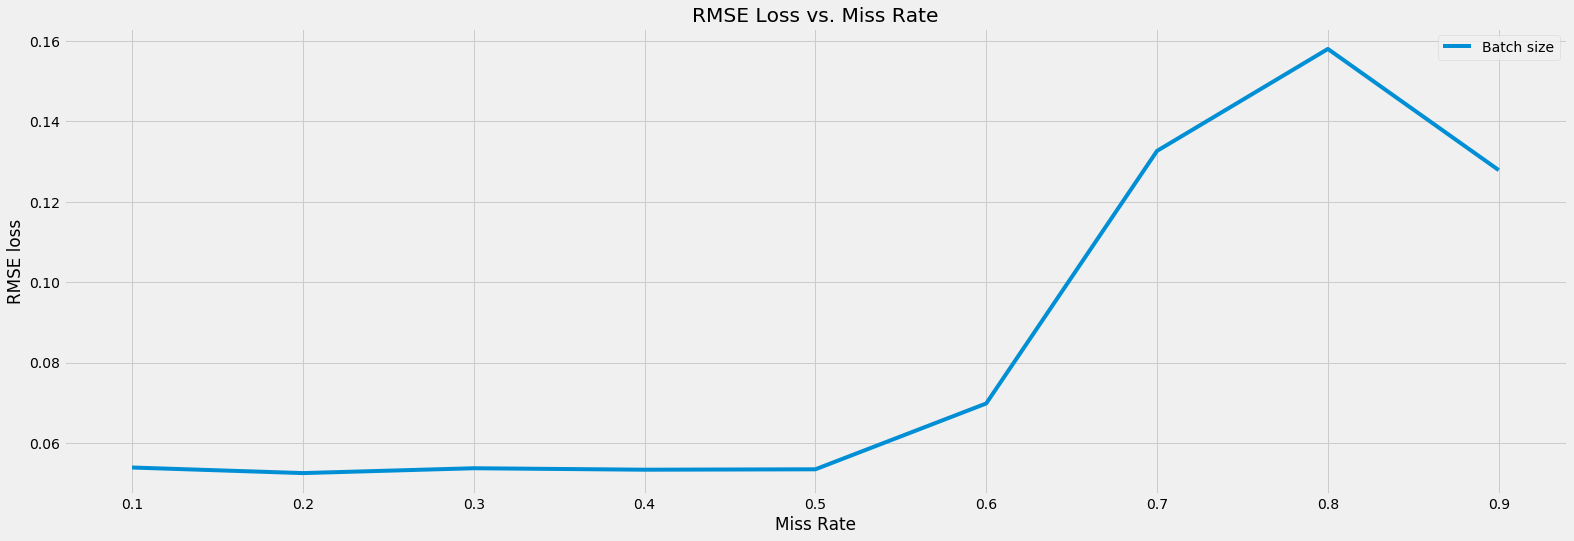

In [52]:
fig = plt.figure(figsize=(24, 8))
plt.title("RMSE Loss vs. Miss Rate")
plt.plot(miss_rate, loss, label = "Batch size")
plt.legend()
plt.ylabel("RMSE loss")
plt.xlabel("Miss Rate")

In [53]:
miss_rate[loss.index(min(loss))]

0.2

In [54]:
min(loss)

0.052493313890475755

In [55]:
loss[4]

0.053437113011320043